### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025
# **Tarea Semanal 6**: *Respuesta en frecuencia de Filtros Pasivos RLC*
#### Mora Taranilla y Victoria Jazmín Salgado

## **Resumen**: 
El objetivo de esta tarea semanal fue comenzar a trabajar con los conceptos de filtros analógicos. En el presente trabajo se analizan e implementan secciones bicuadráticas a partir de funciones de transferencia de segundo orden. Se determinan los parámetros característicos de cada red y se representan los correspondientes diagramas de polos y ceros, junto con las respuestas en frecuencia de módulo y fase. 

## **Introducción**

#### Secciones bicuadráticas: Second Order Sections (SOS)
$$
T(s) = k \cdot \frac{s^2 + s \frac{\omega_{0z}}{Q_z} + \omega_{0z}^2}{s^2 + s \frac{\omega_{0p}}{Q_p} + \omega_{0p}^2}
$$

Siendo:
- $k$ la ganancia del sistema.
- $Q_z$ y $Q_p$ los factores de calidad de los ceros y polos, respectivamente.
- $\omega_{0z}$ y $\omega_{0p}$ las frecuencias naturales de los ceros y polos.

## **Desarrollo del trabajo**
Se comienza por el desarrollo de la función de transferencia $T(s) = \frac{V_2(s)}{V_1(s)}$ del siguiente arreglo circuital.

In [1]:
from IPython.display import HTML, display
display(HTML("<div style='text-align: center;'><img src='circuito_TS6.jpg' width='400'></div>"))

Al tener los componentes en paralelo, se calculó la función transferencia en función de las admitancias, ya que las mismas se suman en este caso. Las admitancias se calculan de la siguiente forma:

- $Y_R (s) = \frac{1}{R}$
- $Y_L (s) = \frac{1}{sL}$
- $Y_C (s) = sC$

De esta forma se calcularon las admitancias esquivalentes:

- $Y_1 (s) = \frac{d}{R} + \frac{b}{sL} + sCa$
- $Y_2 (s) = \frac{1-d}{R} + \frac{1-b}{sL} + sC(1-a)$

La función transferencia se calculó utilizando un divisior de tensión con admitancias, es decir: $T(s) = \frac{Y_1}{Y_1+Y_2}$. 

$$
Y_1 + Y_2 = \frac{d+1-d}{R} + \frac{b+1-b}{sL} + sC(a+1-a) = \frac{1}{R} + \frac{1}{sL} + sC
$$

$$
T(s) = \frac{\frac{d}{R} + \frac{b}{sL} + sCa}{\frac{1}{R} + \frac{1}{sL} + sC}
$$

Se multiplicó en numerador y denominador por la variable $s$, obteniendo así una división de dos cuadráticas:

$$
T(s) = \frac{s \frac{d}{R} + \frac{b}{L} + s^2 Ca}{s \frac{1}{R} + \frac{1}{L} + s^2 C}
$$

Al dividir por los coeficientes principales de las cuadráticas, se obtuvo la función transferencia en una representación mónica.

$$
T(s) = a \cdot \frac{s^2 + s \frac{d}{RCa} + \frac{b}{LCa}}{s^2 + s \frac{1}{RC} + \frac{1}{LC}}
$$

Se demuestra así que la función de transferencia analizada corresponde a una sección bicuadrática, dado que presenta la misma estructura que la forma general desarrollada previamente. A partir de la misma, se pueden despejar los parámetros claves ($k$, $Q_z$, $\omega_{0z}$, $Q_p$ y $\omega_{0p}$) en función de los elementos de la red, obteniendo así:

- $k = a$
- $\omega_{0z} = \sqrt{\frac{b}{LCa}}$
- $Q_z = \sqrt{\frac{b}{LCa}} \cdot \frac{RCa}{d}$
- $\omega_{0p} = \sqrt{\frac{1}{LC}}$
- $Q_p = \sqrt{\frac{1}{LC}} \cdot RC$

### Implementación de Red Bicuadrática


### Diagrama de Polos y Ceros
Utilizando las funciones transferencia, se esquematizaron los diagramas de polos y ceros. Al conocer las constantes, se puede observar tambien su dependencia con los parámetros $k$, $Q_z$, $\omega_{0z}$, $Q_p$ y $\omega_{0p}$. 

Sabemos que los ceros se ubican en los valores de $s$ donde el numerador se vuelve cero, pero no siempre son sencillos de hallar. Si el sistema tiene dos raíces complejas conjugadas, se conoce que los mismos están contenidos en la circunferencia centrada en $(0,0)$ de radio $\omega_{0z}$. Para conocer el lugar exacto, se debe utilizar que 

$$Q_z = \frac{1}{2cos\psi_z}$$

Siendo $\psi_z$ el ángulo que se forma entre el eje negativo real y el cero. De esta misma forma, los ceros se ubican en $s = \omega_{0z} \cdot e^{\pm j\psi_z}$, mismo que decir $s_{1,2} = \omega_{0z} (- \sin{\psi_z} \pm j \cos(\psi_z)) $.

Lo mismo sucede con los polos. A partir de estos resultados, se realizaron gráficos de los diagramas.

#### $T_1(s) = \frac{s^2 + 9}{s^2 + s \sqrt{2} + 1}$
En este caso se puede observar que $k = 1$, $\omega_{0p} = 1$ y $\omega_{0z} = 3$. Los polos se encuentran formando un ángulo de $\psi_p = \frac{\pi}{4}$ con el eje negativo de los reales. Por otro lado, es interesante observar el comportamiento en caso de los ceros. El coeficiente que acompaña al término lineal es cero, ¿cómo se interpreta esto?

Como ya se sabe que $\omega_{0z} = 3$, distinto de cero, la única opción es que $Q_z \rightarrow \infty$. Esto ocurre únicamente cuando $\cos{\psi_z} \rightarrow 0$. Es por ello que se puede concluir que los polos se encontrarán en el eje $j\omega$. 

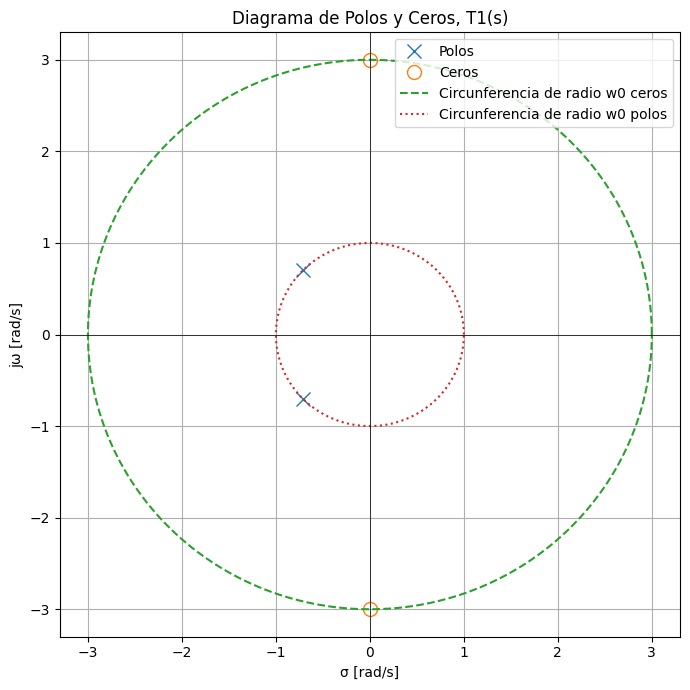

In [8]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

sos_a = [[1,0,9,1,np.sqrt(2),1]]  #(b2,b1,b0,a2,a1,a0)

z_a, p_a, k_a = sig.sos2zpk(sos_a)

# Parámetros de la circunferencia
w0_z_a = 3
w0_p_a = 1
x0, y0 = 0, 0  # centro 
theta = np.linspace(0, 2*np.pi, 500)

plt.figure(figsize=(7,7))
plt.plot(np.real(p_a), np.imag(p_a), 'x', markersize=10, label='Polos')
if len(z_a) > 0:
    plt.plot(np.real(z_a), np.imag(z_a), 'o', markersize=10, fillstyle='none', label='Ceros')
plt.plot(w0_z_a * np.cos(theta), w0_z_a * np.sin(theta), label='Circunferencia de radio w0 ceros', linestyle='--')
plt.plot(w0_p_a * np.cos(theta), w0_p_a * np.sin(theta), label='Circunferencia de radio w0 polos', linestyle=':')
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.title('Diagrama de Polos y Ceros, T1(s)')
plt.xlabel('σ [rad/s]')
plt.ylabel('jω [rad/s]')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

Se puede observar que los resultados obtenidos de forma analítica coinciden con el gráfico.

#### $T_2(s) = \frac{s^2 + \frac{1}{9}}{s^2 + s \frac{1}{5} + 1}$
En caso de esta función de transferencia se ve que se modifica la ubicación de los ceros ya que $\omega_{0z} = \frac{1}{3}$. De igual forma se mantiene el mismo $\psi_z$, ya que el coeficiente lineal es cero. En caso de los polos, se mantiene el mismo $\omega_0p$, por lo que los mismos se encuentran en la circunferencia radio $1$. Al despejar

### Respuesta en Módulo y Fase

## **Bonus**

## **Conclusiones**

## **Autoevaluación**